In [1]:
import csv

subset_annotated_file = "subset_evaluation.csv"

def process_scores_category(category_name):
    figure_score = 0
    table_score = 0
    total_score = 0
    total_figures = 0
    total_tables = 0
    
    with open(subset_annotated_file, "r") as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=';', quotechar='|', quoting=csv.QUOTE_MINIMAL)
        
        for row in csv_reader:
            if row[0] == category_name:
                try:
                    score = float(row[-1])
                except Exception:
                    print(row)
                    raise ValueError()

                object_id = row[1]
                if "TAB" in object_id:
                    table_score += score
                    total_tables += 1
                elif "FIG" in object_id:
                    figure_score += score
                    total_figures += 1

        total_score = (figure_score + table_score) / (total_figures + total_tables)
        print(f"Average total score:  {total_score:.4f}")
        print(f"Average figure score: {(figure_score / total_figures):.4f}")
        print(f"Average table score:  {(table_score / total_tables):.4f}")
        
        return total_score
        
def get_average_scores_complete():
    output_dict = {}
    
    categories = set()
    with open(subset_annotated_file, "r") as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=';', quotechar='|', quoting=csv.QUOTE_MINIMAL)
        
        for row in csv_reader:
            categories.add(row[0])
            
    for cat in categories:
        print(f"Results for {cat}:")
        print("#########################")
        cat_score = process_scores_category(cat)
        output_dict[cat] = cat_score
        print()
        
    return output_dict

In [2]:
score_dict = get_average_scores_complete()

Results for gpt4:
#########################
Average total score:  0.6852
Average figure score: 0.7000
Average table score:  0.6765

Results for qwen:
#########################
Average total score:  0.6963
Average figure score: 0.6800
Average table score:  0.7059

Results for ovis:
#########################
Average total score:  0.6074
Average figure score: 0.6400
Average table score:  0.5882

Results for internvl:
#########################
Average total score:  0.6370
Average figure score: 0.5600
Average table score:  0.6824

Results for paligemma:
#########################
Average total score:  0.4333
Average figure score: 0.4300
Average table score:  0.4353

Results for minicpm:
#########################
Average total score:  0.5593
Average figure score: 0.5600
Average table score:  0.5588

Results for instructblip:
#########################
Average total score:  0.2333
Average figure score: 0.3100
Average table score:  0.1882

Results for llava:
#########################
Average tot

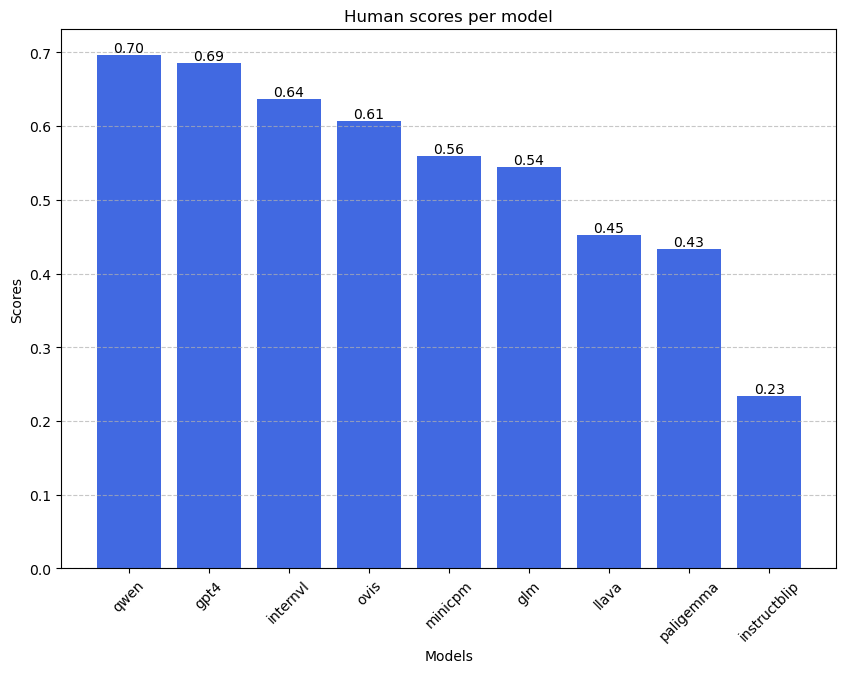

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

sorted_items = sorted(score_dict.items(), key=lambda x: x[1], reverse=True)
categories, scores = zip(*sorted_items)

plt.figure(figsize=(10, 7))
bars = plt.bar(categories, scores, color='royalblue')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval,
             f"{yval:.2f}", ha='center', va='bottom', fontsize=10, color='black')

plt.xlabel("Models")
plt.ylabel("Scores")
plt.title("Human scores per model")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [4]:
# Get human performance
human_annotated_file = "human_responses_task1_annotated.csv"

with open(human_annotated_file, "r") as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=';', quotechar='|', quoting=csv.QUOTE_MINIMAL)
    
    categories = {
        "Overall": {"matches": 0, "total": 0},
        "Figure": {"matches": 0, "total": 0},
        "Table": {"matches": 0, "total": 0}
    }
    
    for row in csv_reader:
        object_id = row[0]
        score = float(row[-1])
        cat = "Figure" if "_FIG_" in object_id else "Table"
        
        categories[cat]["matches"] += score
        categories[cat]["total"] += 1
        
    categories["Overall"]["matches"] = categories["Table"]["matches"] + categories["Figure"]["matches"]
    categories["Overall"]["total"] = categories["Table"]["total"] + categories["Figure"]["total"]
    
    print(f"Results for humans on subset:")
    print("=" * 30)
    for category in categories:
        match_count = categories[category]["matches"]
        total_count = categories[category]["total"]
        partion = match_count / total_count if total_count > 0 else 0
        print(f"{category:<7}: {match_count:<5} / {total_count:<5} -> {partion:.2%}")

Results for humans on subset:
Overall: 94.5  / 135   -> 70.00%
Figure : 31.0  / 50    -> 62.00%
Table  : 63.5  / 85    -> 74.71%
